<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/P3-Practica-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Parte II: Segmentación y Recomendación

El dataset MovieLens 100K contiene información de 1682 películas, cada una representada por su título y 18 géneros cinematográficos (Action, Adventure, Drama, etc.), codificados como variables binarias. Estos datos, recolectados de calificaciones de 943 usuarios, permiten analizar las características intrínsecas de las películas independientemente de las preferencias de los usuarios.

El objetivo de esta práctica es realizar segmentación de películas mediante técnicas de clustering (como K-Means o clustering jerárquico) para identificar grupos naturales basados en sus géneros. Esto podría revelar patrones como *películas de acción con toques de sci-fi* o *dramas románticos con elementos musicales*, útiles para sistemas de recomendación o catálogos personalizados.

[Dataset completo en Kaggle](https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset/data)

In [1]:
import os
import pandas as pd
import kagglehub
import numpy as np

path = kagglehub.dataset_download("prajitdatta/movielens-100k-dataset")
path = '/root/.cache/kagglehub/datasets/prajitdatta/movielens-100k-dataset/versions/1/ml-100k'
fname = os.path.join(path, 'u.item')

movies_df = pd.read_csv(fname, sep='|', encoding='latin-1', names=[
    'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
])

def get_year(date):
    try:
        return int(date.split('-')[-1])
    except:
        return np.nan

movies_df.drop(['video_release_date', 'unknown','IMDb_URL','movie_id'], axis=1, inplace=True)
movies_df['date'] = movies_df['release_date'].apply(get_year)
movies_df.drop('release_date', axis=1, inplace=True)
movies_df

100%|██████████| 4.77M/4.77M [00:00<00:00, 147MB/s]

Extracting files...


,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
1,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
3,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
4,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998.0
1678,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998.0
1679,Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998.0
1680,You So Crazy (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994.0


## Instrucciones

1. Verifica si hay variables faltantes.
2. Extraer las variables numéricas para formar la matriz de caracteristicas $X$.
3. Verifica los rangos de las variables, aplica re-escalamiento si lo consideras necesario.
4. Usa K-Means con algún valor $K$ de tu elección, haz clustering y mide el valor de silueta.
5. Encuentra el valor de codo y con ese valor, vuelve a hacer clustering y mide el valor de silueta.
6. Con el valor de $K$ que consideres mejor, extrae las etiquetas de los clusters y añadelas al dataframe `movies_df`.
7. Muestra un dataframe por cada cluster mostrando los títulos de las películas de cada cluster. ¿Es posible identificar, visualmente, qué define a cada cluster?


In [3]:
# Verifica si hay variables faltantes.
print(movies_df.isnull().sum())
print(movies_df.shape)

title          0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
date           1
dtype: int64
(1682, 20)


In [4]:
# Remover filas con variables faltantes
movies_df.dropna(inplace=True)
print(movies_df.shape)

(1681, 20)


In [6]:
# Extraer las variables numéricas para formar la matriz de caracteristicas  𝑋 .
print(movies_df.dtypes)
# Seleccionar columnas de generos de peliculas
genre_cols = movies_df.select_dtypes(include='number').columns.drop('date').tolist()
X = movies_df[genre_cols]


title           object
Action           int64
Adventure        int64
Animation        int64
Children's       int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
date           float64
dtype: object


In [7]:
#Verifica los rangos de las variables, aplica re-escalamiento si lo consideras necesario.
print(X.describe())

            Action    Adventure    Animation   Children's       Comedy  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean      0.149316     0.080309     0.024985     0.072576     0.300416   
std       0.356506     0.271852     0.156126     0.259516     0.458576   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Crime  Documentary        Drama      Fantasy    Film-Noir  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean      0.064842     0.029744     0.431291     0.013087     0.014277   
std       0.246321     0.169931     0.495404     0.113683     0.118667   
min       0.000000     0.000000     0

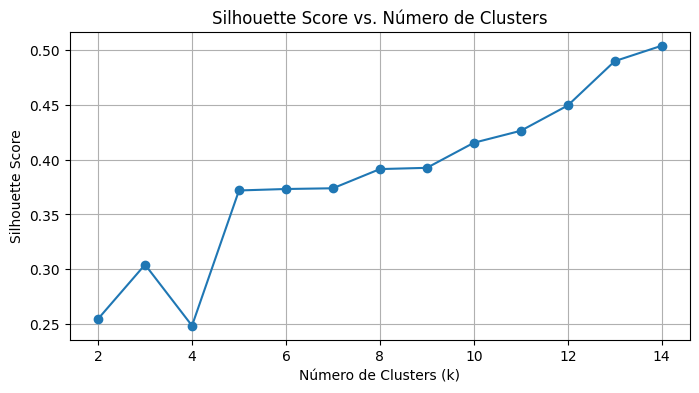

In [14]:
# Usa K-Means con algún valor  𝐾  de tu elección, haz clustering y mide el valor de silueta.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
ks = range(2, 15)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Número de Clusters')
plt.grid(True)
plt.show()

In [15]:
for k, score in zip(ks, silhouette_scores):
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.2548
k=3, Silhouette Score=0.3043
k=4, Silhouette Score=0.2486
k=5, Silhouette Score=0.3719
k=6, Silhouette Score=0.3732
k=7, Silhouette Score=0.3739
k=8, Silhouette Score=0.3914
k=9, Silhouette Score=0.3925
k=10, Silhouette Score=0.4153
k=11, Silhouette Score=0.4263
k=12, Silhouette Score=0.4493
k=13, Silhouette Score=0.4897
k=14, Silhouette Score=0.5038


In [36]:
from sklearn.metrics import silhouette_score

k_codo = 6
kmeans_codo = KMeans(n_clusters=k_codo, random_state=42)
labels_codo = kmeans_codo.fit_predict(X)

silhouette = silhouette_score(X, labels_codo)
print(f"Silhouette Score con K={k_codo}: {silhouette:.4f}")

Silhouette Score con K=6: 0.3732


In [37]:
movies_df['cluster'] = labels_codo


         Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
cluster                                                                         
0          0.78       0.20       0.00        0.00    0.05   0.05         0.00   
1          0.03       0.01       0.00        0.02    0.00   0.07         0.00   
2          0.00       0.05       0.01        0.00    0.00   0.12         0.15   
3          0.05       0.54       0.42        1.00    0.16   0.00         0.00   
4          0.04       0.00       0.01        0.06    1.00   0.03         0.00   
5          0.99       0.36       0.02        0.03    0.06   0.08         0.00   

         Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
cluster                                                                         
0         0.49     0.00       0.00    0.00     0.00     0.05     0.83    0.07   
1         1.00     0.01       0.00    0.01     0.01     0.02     0.12    0.01   
2         0.00     0.00    

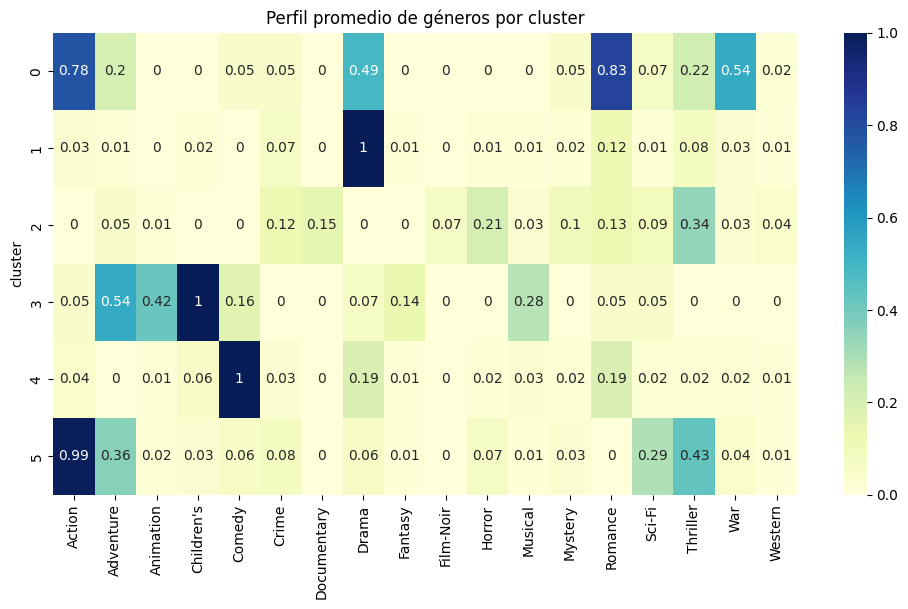

In [38]:
# Agrupar por cluster y calcular promedio de cada género
cluster_profiles = movies_df.groupby('cluster')[genre_cols].mean().round(2)

# Mostrar tabla resumen
print(cluster_profiles)

# Graficar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles, annot=True, cmap="YlGnBu")
plt.title("Perfil promedio de géneros por cluster")
plt.show()